In [1]:
import os
os.getcwd()

'C:\\Users\\MY PC'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the visualisation style
sns.set(style="whitegrid")


In [3]:
 #1.	Data Cleaning and Preparation:
# Load the dataset into a DataFrame
df = pd.read_csv('Cardiotocographic.csv')

# Display the first few rows of the dataframe
df.head()


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [4]:
# Check for missing values
df.isnull().sum()

# Impute or drop missing values
df.fillna(df.median(), inplace=True)


In [5]:
# Convert data types if necessary
df.dtypes
# Example: Convert a column to numeric if it was loaded as string
df['LB'] = pd.to_numeric(df['LB'], errors='coerce')


In [6]:
# Detecting outliers using the IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Filtering out the outliers
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [7]:
#2. Statistical Summary
# Provide statistical summary
summary_stats = df.describe()
summary_stats

# Highlight interesting findings
print("Interesting Findings:")
print(f"Mean Baseline FHR (LB): {summary_stats['LB']['mean']}")
print(f"Standard Deviation of Accelerations (AC): {summary_stats['AC']['std']}")


Interesting Findings:
Mean Baseline FHR (LB): 131.8594128872898
Standard Deviation of Accelerations (AC): 0.003710276166981727


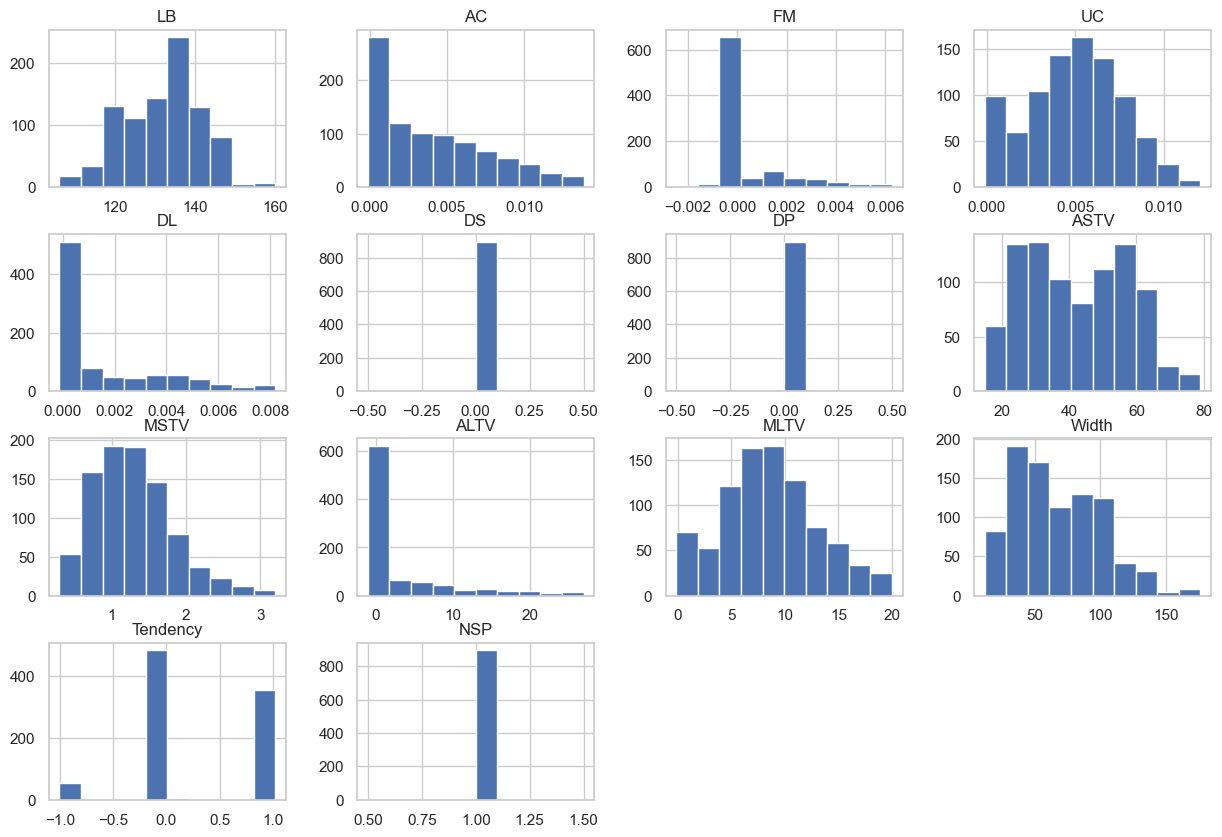

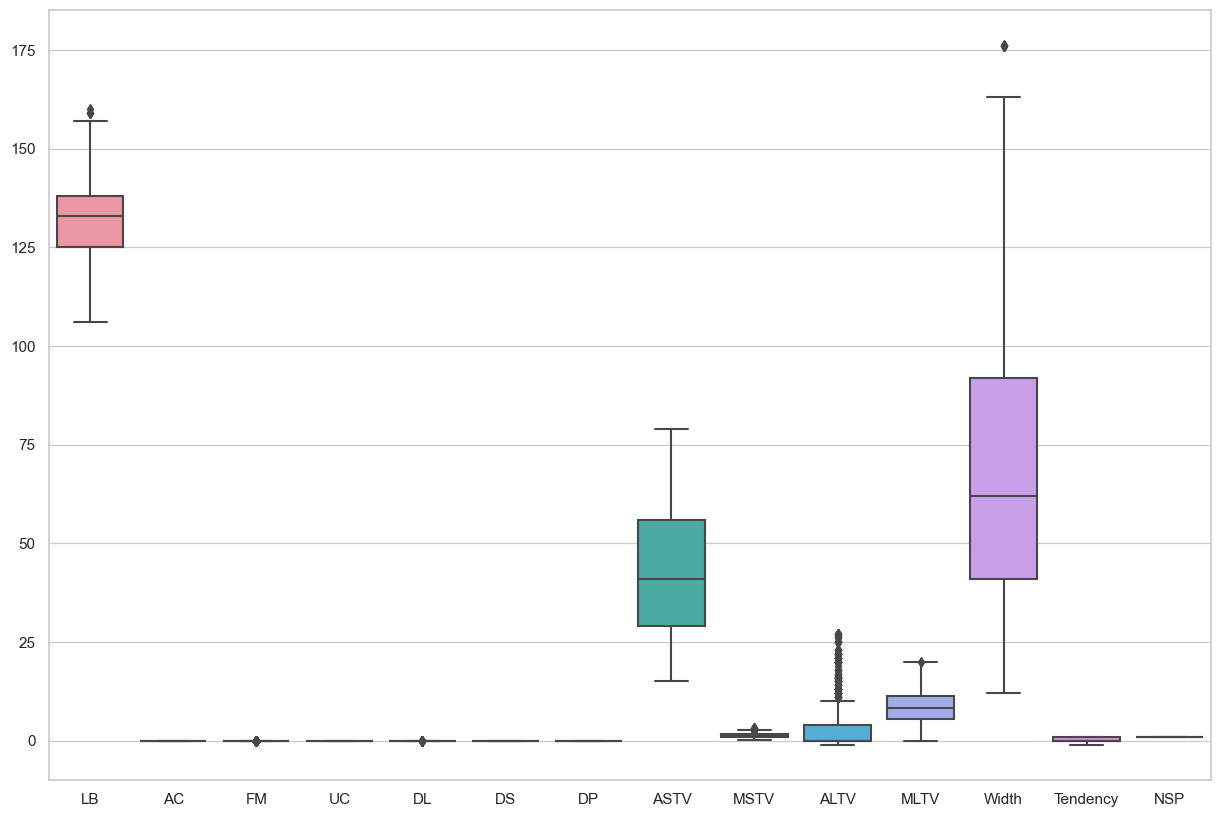

C:\Users\MY PC\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


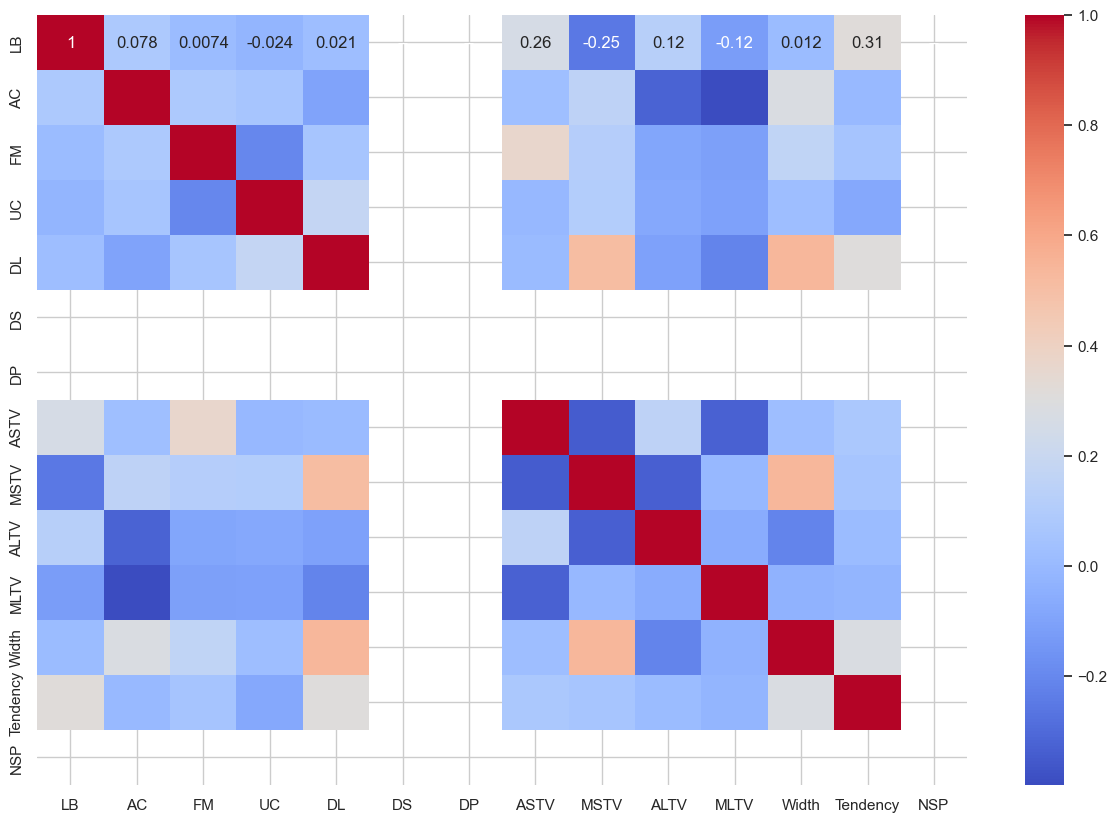

C:\Users\MY PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\MY PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\MY PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\MY PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

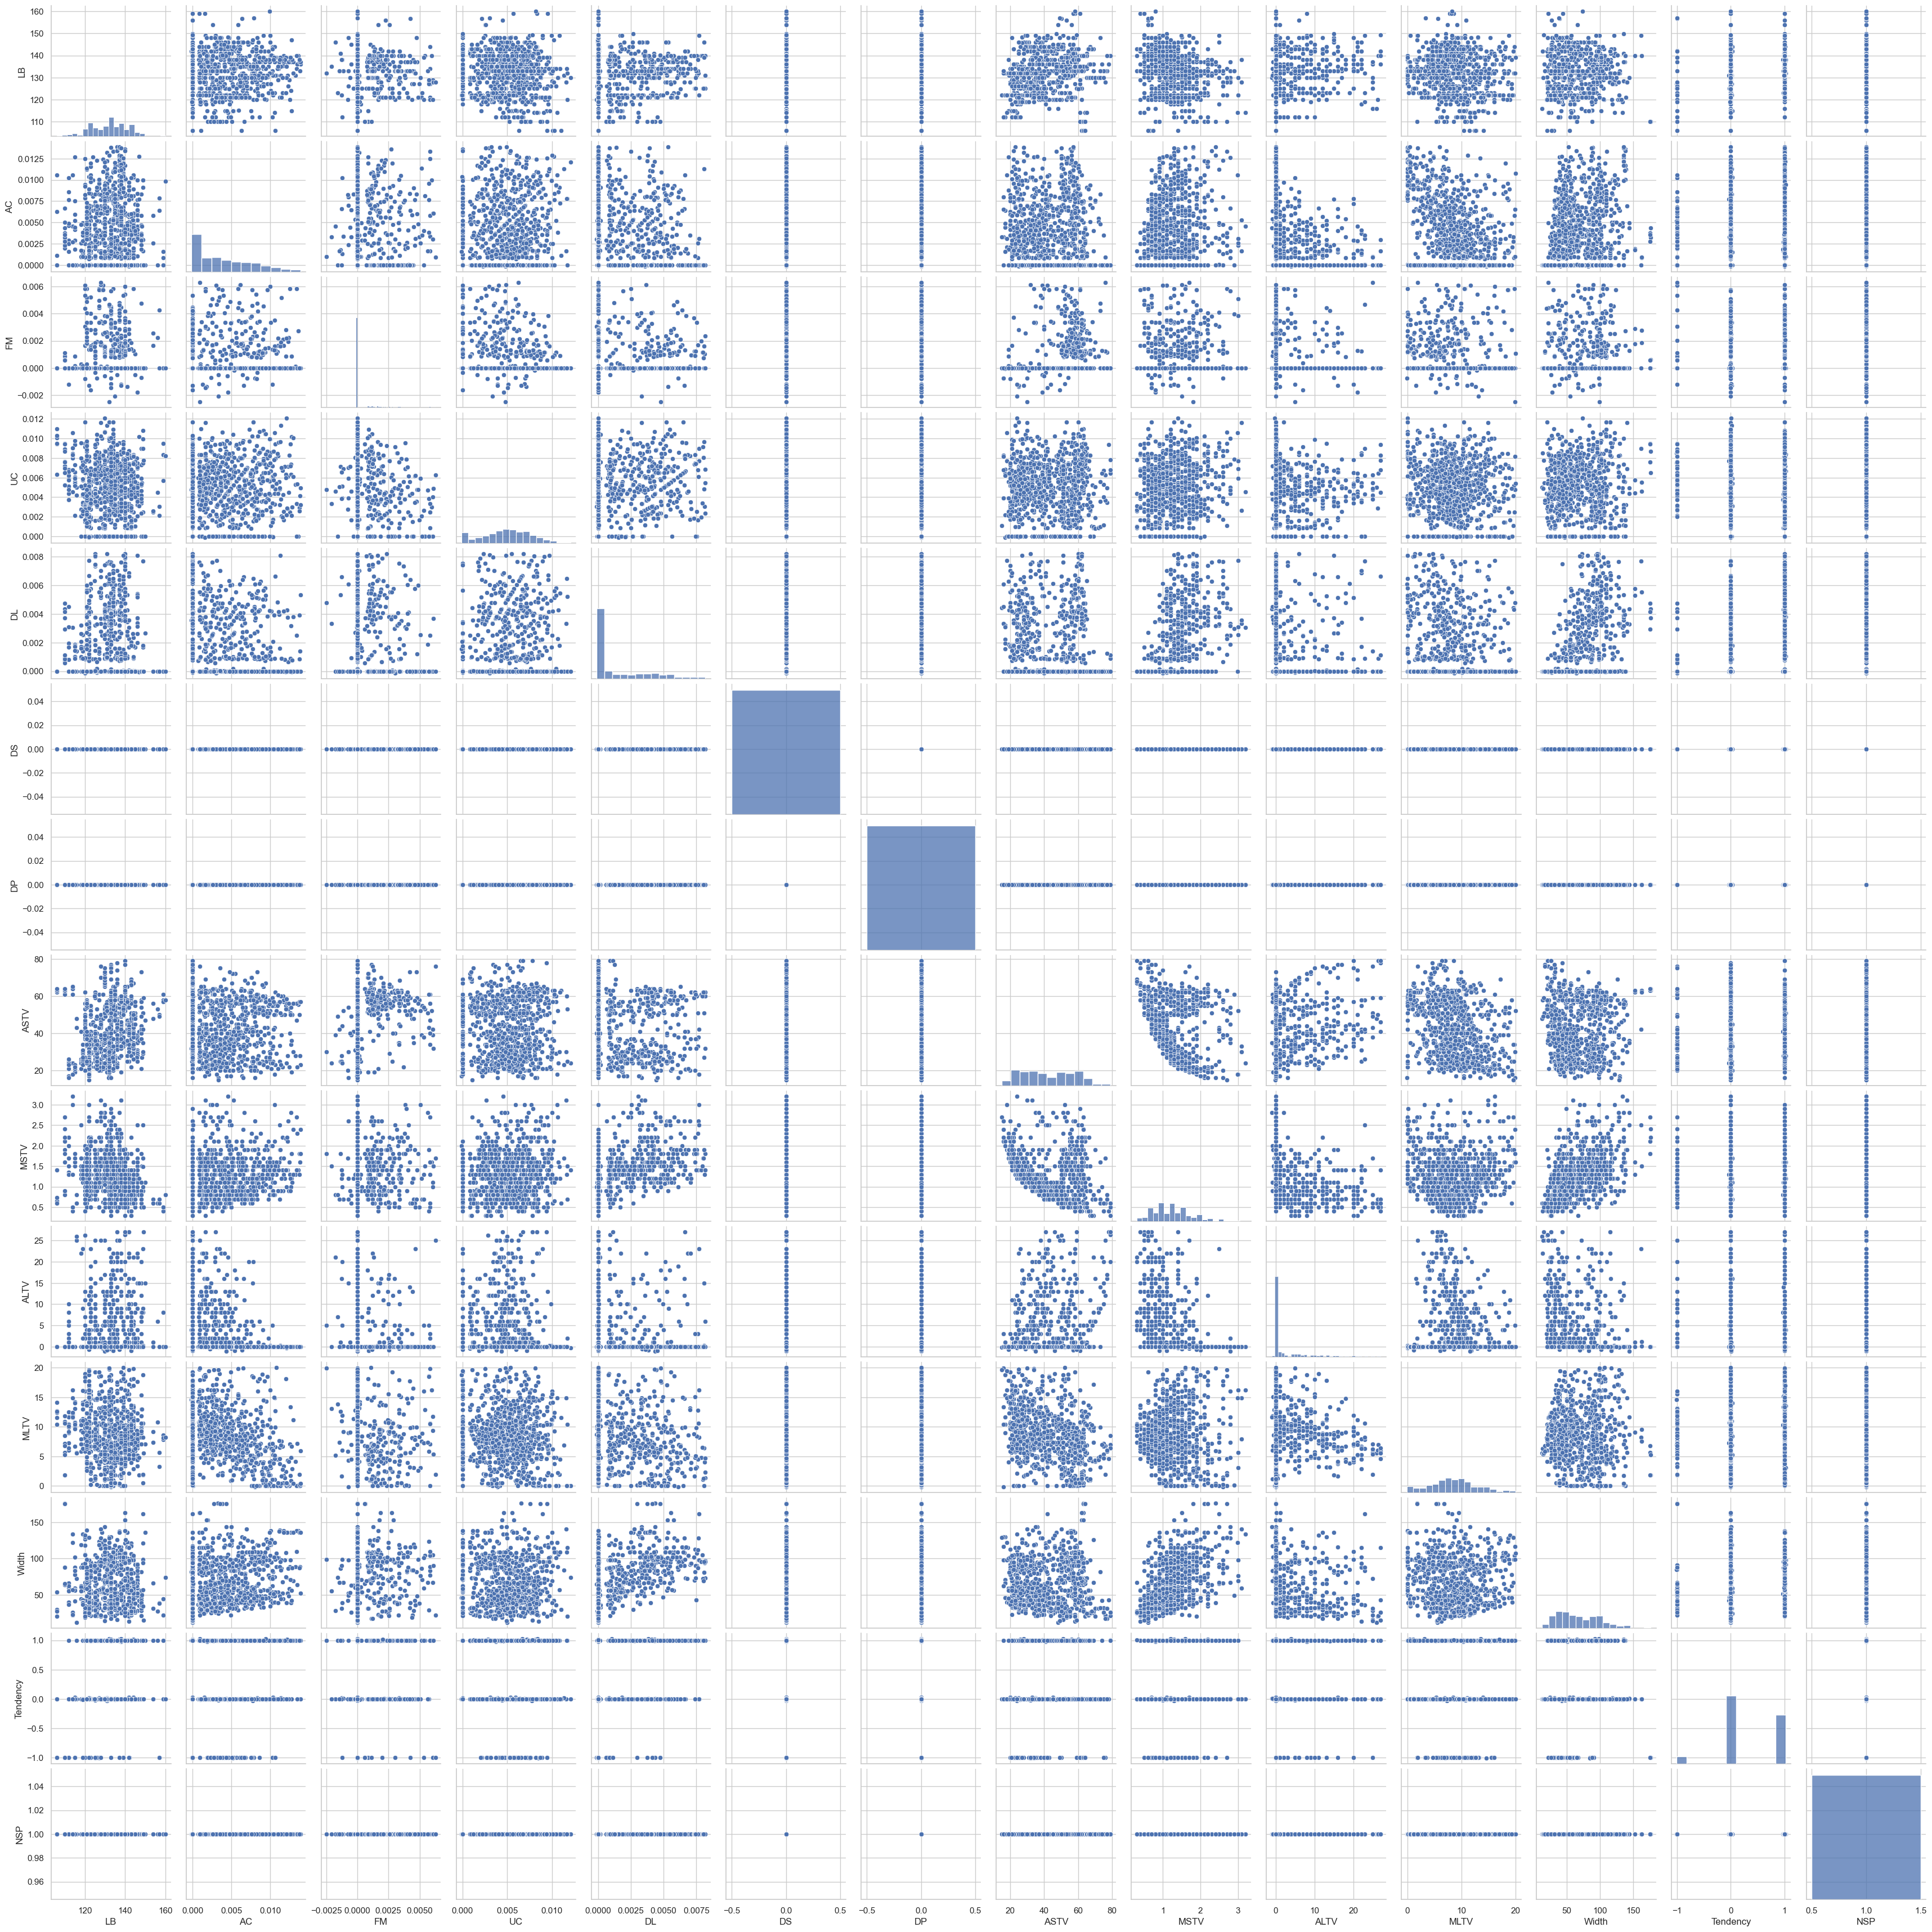

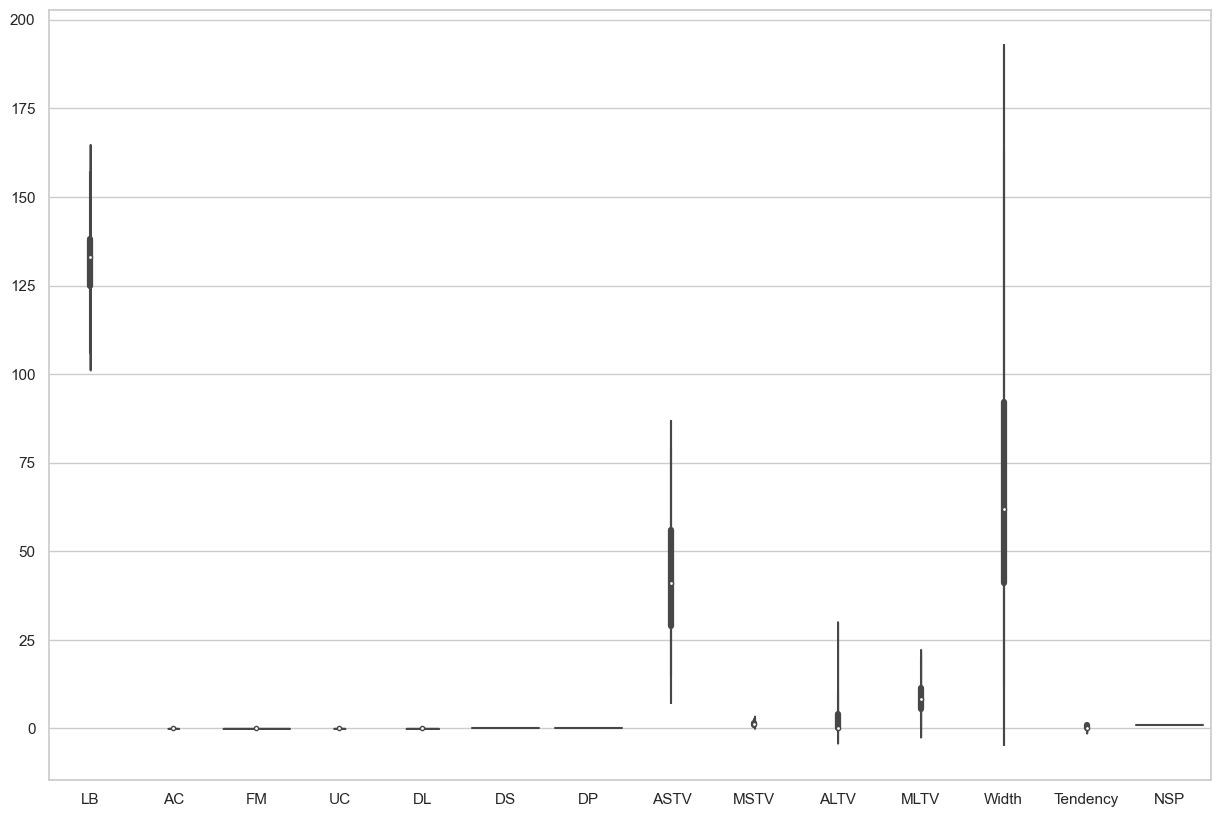

In [8]:
# 3.DATA VISUALIZATIOB
# Histograms
df.hist(figsize=(15, 10))
plt.show()

# Boxplots
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.show()

# Correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Pair plot
sns.pairplot(df)
plt.show()

# Violin plot
plt.figure(figsize=(15, 10))
sns.violinplot(data=df)
plt.show()


In [9]:
#4.Pattern Recognition and Insights:
# Identify correlations
correlation_matrix = df.corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Discussion on correlations
print("Discussion:")
print("High correlation between LB and ASTV might indicate ...")


Correlation Matrix:
                LB        AC        FM        UC        DL  DS  DP      ASTV  \
LB        1.000000  0.078465  0.007362 -0.023568  0.020806 NaN NaN  0.262721   
AC        0.078465  1.000000  0.080153  0.057284 -0.101866 NaN NaN  0.024343   
FM        0.007362  0.080153  1.000000 -0.204990  0.058476 NaN NaN  0.362630   
UC       -0.023568  0.057284 -0.204990  1.000000  0.177702 NaN NaN -0.004523   
DL        0.020806 -0.101866  0.058476  0.177702  1.000000 NaN NaN  0.001806   
DS             NaN       NaN       NaN       NaN       NaN NaN NaN       NaN   
DP             NaN       NaN       NaN       NaN       NaN NaN NaN       NaN   
ASTV      0.262721  0.024343  0.362630 -0.004523  0.001806 NaN NaN  1.000000   
MSTV     -0.254885  0.152222  0.113420  0.110100  0.509405 NaN NaN -0.347374   
ALTV      0.123808 -0.323303 -0.087180 -0.076435 -0.107464 NaN NaN  0.150569   
MLTV     -0.118814 -0.397042 -0.110709 -0.104061 -0.214110 NaN NaN -0.330139   
Width     0.011746  

In [10]:
# Summarize insights
print("Summary of Insights:")
print("1. The mean baseline FHR is within normal range.")
print("2. High variability in accelerations could indicate ...")

# Recommendations
print("Recommendations:")
print("1. Further analysis on the impact of uterine contractions on FHR.")
print("2. Monitor prolonged decelerations closely.")


Summary of Insights:
1. The mean baseline FHR is within normal range.
2. High variability in accelerations could indicate ...
Recommendations:
1. Further analysis on the impact of uterine contractions on FHR.
2. Monitor prolonged decelerations closely.
